In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [174]:
import warnings
warnings.filterwarnings('ignore')

In [175]:
df=pd.read_excel("Superstore_USA.xlsx")

In [176]:
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [177]:
df.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')

### KDE OF NUMERIC DATAS

#### kde works with probability density function
here most of the columns uses continous pdf

### Some Common Info About Plot

the higher the gradient the more distributions(values) must be around it
,higher gradient= higher density,
if flat (i.e flat like discrete) it means that there is no underlying distribution around that area 

In [151]:
sns.set_style("whitegrid")
sns.color_palette("magma")

[(0.135053, 0.068391, 0.315),
 (0.372116, 0.092816, 0.499053),
 (0.594508, 0.175701, 0.501241),
 (0.828886, 0.262229, 0.430644),
 (0.973381, 0.46152, 0.361965),
 (0.997341, 0.733545, 0.505167)]

In [141]:
#plt.style.use("light_background")

In [184]:
def kde_plot(x,fig):
    plt.figure(figsize=(15,10))
    
    plt.subplot(4,2,fig)
    sns.kdeplot(df[x],shade=True,palette=("magma"),color='grey')
    plt.title(x+' KDE ')
    plt.show()

plt.figure(figsize=(30,40))   

<Figure size 2160x2880 with 0 Axes>

<Figure size 2160x2880 with 0 Axes>

In [185]:
# kde_plot("Product Base Margin",1)
# kde_plot("Unit Price",2)

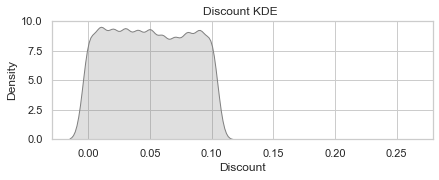

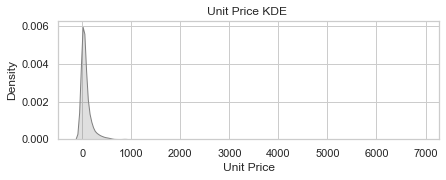

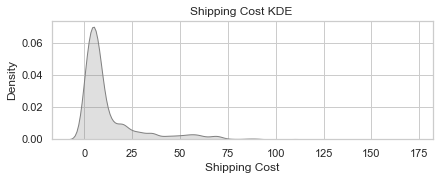

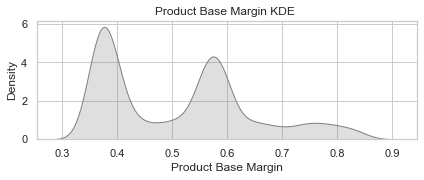

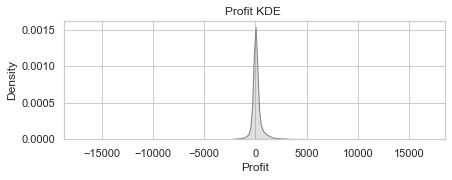

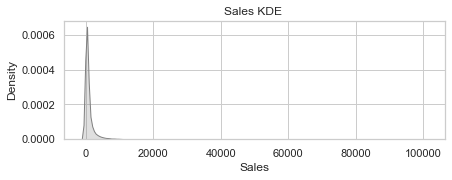

In [187]:
n=1
for i in df.columns:
    if (df[i].dtype)=="float64":
        kde_plot(i,n)
        n+=1

#### for both kde and histogram+kde

In [183]:
# def kde_plot(x,fig):
#     plt.figure(figsize=(15,10))
    
#     plt.subplot(4,2,fig)
#     sns.kdeplot(df[x],shade=True,palette=("magma"),color='grey')
#     plt.title(x+' KDE ')
#     plt.subplot(4,2,(fig+1))
#     plt.title(x+'histogram and kde')
#     sns.histplot(df[x],kde=True,palette=("magma"))
#    # plt.axhline(round(df[x].value_counts().mean()),color = "red",label="Mean")
    
#     plt.legend()
#     plt.show()

# plt.figure(figsize=(30,40))   

## HISTOGRAMS OF NUMERIC DATA

In [217]:
def kde_plot(x,fig):
    plt.figure(figsize=(15,20))
    
    
    plt.subplot(4,2,fig)
    sns.histplot(df[x],kde=True,palette=("magma"),color='grey')
    plt.axvline(df[x].mean(), color = "green",label="Mean")
    plt.axvline(df[x].median(), color = "red",label="Mean")
    plt.axvline(df[x].mode().mean(), color = "black",label="Mode")

    plt.title(x+' histogram and kde')
   # plt.axhline(round(df[x].value_counts().mean()),color = "red",label="Mean")
    
    plt.show()

plt.figure(figsize=(30,40))   

<Figure size 2160x2880 with 0 Axes>

<Figure size 2160x2880 with 0 Axes>

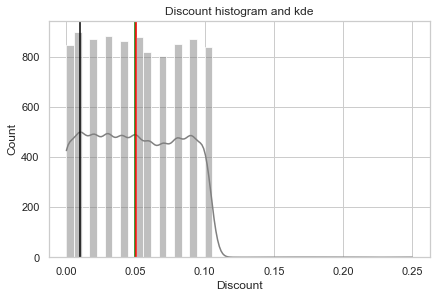

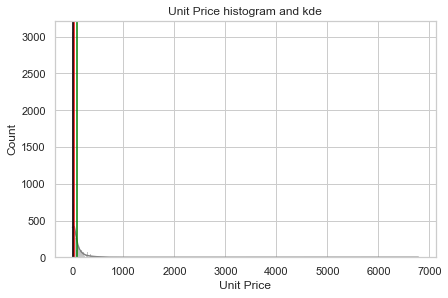

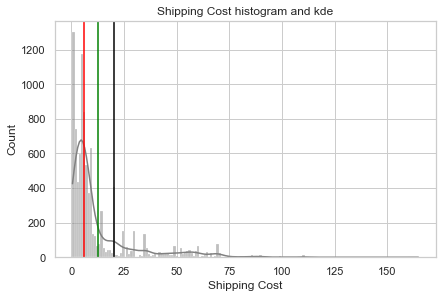

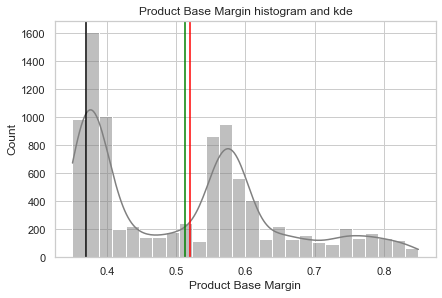

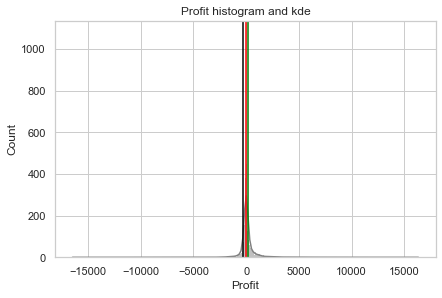

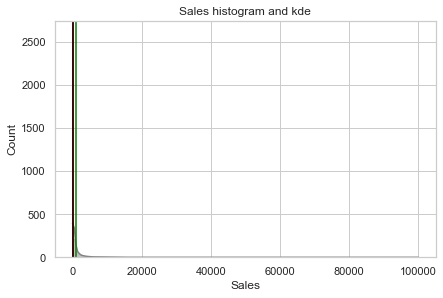

In [218]:
n=1
for i in df.columns:
    if (df[i].dtype)=="float64":
        kde_plot(i,n)
        n+=1

here we can understand that how much data is spread and the line of mean and median help us to determine that how much data is over and under over mean,median and mode
these summarizes whole column and represents the data's center point or typical value.